<a href="https://colab.research.google.com/github/darioLabrador/vinho-verde/blob/dev/csc2034-ds-demos-master/01_logistic_regression_svm_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression, Linear SVM, and Decision Trees
## CSC2034
### Based on the labs of Cameron Trotter


Welcome to the CSC2034 practicals. Throughout these sessions, you will learn how to use Python and the [sklearn package](https://scikit-learn.org/stable/) to perform basic data science, using models to infer relationships from data. I'd encourage you to make use of the demonstrators here, as well as explore things at your own pace. There are potentially multiple ways of performing operations in these notebooks, and Paolo will go through the theoretics in his lectures. Remeber, Google and Stack Overflow are your friend - just try to understand the code you find rather than blindly copying it in!

Data science is an extremely broad topic, so let's begin with one of the simplest forms of model you might encounter, [logistic regression](https://www.w3schools.com/python/python_ml_logistic_regression.asp). This type of model is great for binary classification of data (that which contains only two possible classes). After this, we will take a look at a [Linear Support Vector Machine (SVM)](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) and [Decision Trees](https://www.w3schools.com/python/python_ml_decision_tree.asp).

### Google Colab Setup

All of the notebooks you will be running in these lab sessions are designed to be ran using [Google Colab](https://colab.research.google.com/). For setup instructions, see this repo's README.

In order to make things work on colab, we need to clone this repo and then (in another cell because colab dictates this...) move into the repo directory.

In [ ]:
!git clone https://github.com/EllyOK/data_visulisation.git

In [ ]:
import os
os.chdir('data_visulisation/csc2034-ds-demos-master')

## Make sure to fill out the hash symbols

You will notice a # throughout these notebooks.  The code will not run without filling out areas indicated with a #.  Below there is an example.  To solve this issue, Please go to the sci-kit learn docs and search for make_classification.  

In [5]:
from sklearn.datasets import make_classification

n_samples = 1000
n_classes = 2
n_features = 2
n_clusters_per_class = 2
n_redundant = 0
n_informative = 2
random_state = 5
flip_y = 0.1

data, labels = make_classification(n_samples=n_samples, n_features=n_features,
                                   n_informative=n_informative,
                                   n_redundant=n_redundant,n_classes=n_classes,
                                   n_clusters_per_class=n_clusters_per_class,
                                   flip_y=flip_y, random_state=5)

Once created, `data` should be a numpy array of shape (n_samples, n_features), with each feature being a float. `labels` should be a numpy array of shape (1000,) representing the interger class labels of each datapoint, either 0 or 1.

Run the below checks. If any return False, take another look at the code you have written before continuing.

In [6]:
print(f"data is of shape (n_samples, n_features): {data.shape == (n_samples, n_features)}")
print(f"data is float: {data.dtype == 'float64'}")
print(f"labels is of shape (n_samples,): {labels.shape == (n_samples,)}")
print(f"labels is int: {labels.dtype == 'int64'}")
print(f"Random state set correctly: {data[0].tolist() == [1.031573753611461, 0.9858931626901614]} ")

data is of shape (n_samples, n_features): True
data is float: True
labels is of shape (n_samples,): True
labels is int: True
Random state set correctly: True 


### Visualisation

Being able to visually examine the data you have created is extremely important, so let's take a look at what we have. [Seaborn](https://seaborn.pydata.org/) is a powerful visualisation package built on top of [matplotlib](https://matplotlib.org/stable/users/index.html); let's use it. We're going to make lots of scatterplots here, so I've made a function to reduce code duplication, which can be found in `helpers.py`.

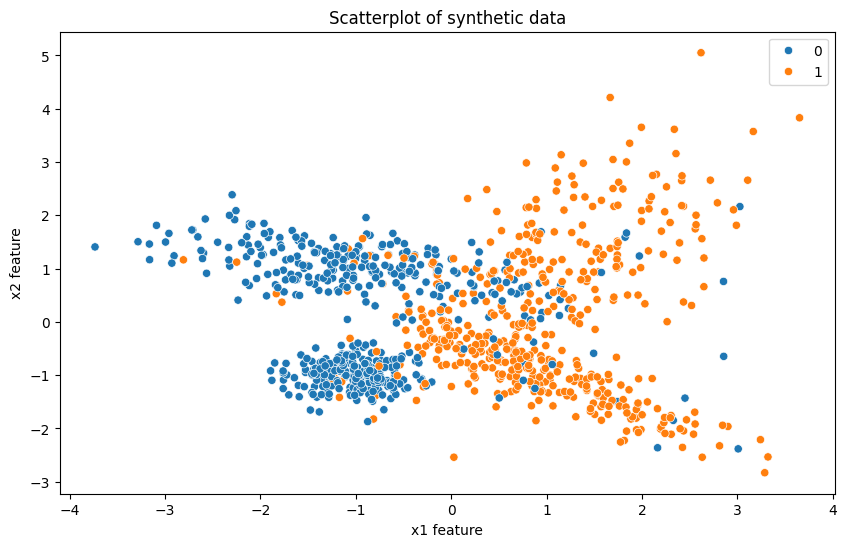

In [7]:
from helpers import show_scatterplot

show_scatterplot(data, labels, title = "Scatterplot of synthetic data",
                xlabel = 'x1 feature', ylabel = 'x2 feature')

From the plot we can see we have created a simple dataset, where each datapoint contains two features, `x1` and `x2`, and a class label (commonly denoted `y` in data science package documentation), either `0` or `1`.

### Spliting Into Sets

Now that we have some data, we need to put it in a form usable to train a model on. For this, we need to split the data into a train and test set. In practice we might also split these further to create a validation set, but here we will keep it simple.

As the names imply, we will utilise the train set to train our model and the test set to test its performance. It is _very_ important that we do not mix the sets, as using training data at test time can skew your metrics. Thankfully, sklearn has the ability to split the data for us through the `train_test_split` method.

For your next task, use `train_test_split` to create two sets where the train set contains 80% of the entire dataset. The [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) may help you.

NOTE: Make sure you set the `random_state` of the method to the same value as previously to ensure reproducability.

In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, train_size=0.8, random_state=random_state)

Once complete your train set should contain 80% of the whole dataset, with your test set containing the rest.

Run the below checks. If any return False, take another look at the code you have written before continuing.

In [18]:
print(f"train set is 80% of dataset: {len(data_train) == n_samples * 0.8}")
print(f"test set is 20% of dataset: {len(data_test) == n_samples * 0.2}")
print(f"Random state set correctly: {data_train[0].tolist() == [-1.2833740134353988, -1.4154849762712642]} ")

train set is 80% of dataset: True
test set is 20% of dataset: True
Random state set correctly: True 


### Data Scaling

In the vast majority of cases, before we can use the splits we have created we will need to scale them. This processes forces our data to have a mean of 0 and a variance of 1, and is required to allow for optimal performance of many common machine learning models. If you want to see the negative effect not scaling your data can have, scikit-learn has a [section on the effects of not standardizing your data](
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

Sklearn provides the `StandardScaler` functionality which allows us to very quickly scale our splits to meet the required conditions. Unlike the other functionality provided by sklearn we have used so far, `StandardScaler` needs to be fitted to the training data, that is it needs to learn some parameters in order to operate. The [docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for `StandardScaler` provides more information regarding this.

For your next task, scale the train and test splits you have created so that the data has a mean of 0 and a variance of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#...

data_train_scaled = #...
data_test_scaled = #...

Run the below checks. If any return False, take another look at the code you have written before continuing.

In [ ]:
print(f"train set has been correctly scaled: {data_train_scaled[0].tolist() == [-0.9534808523834634, -1.1352230069380507]}")
print(f"test set has been correctly scaled: {data_test_scaled[0].tolist() == [1.2480977883641757, -0.8652814153775584]}")

Now let's visualise our scaled splits:

In [ ]:
show_scatterplot(data_train_scaled, labels_train, title = "Scatterplot of synthetic, scaled, train data",
                xlabel = 'x1 feature', ylabel = 'x2 feature')


show_scatterplot(data_test_scaled, labels_test, title = "Scatterplot of synthetic, scaled, test data",
                xlabel = 'x1 feature', ylabel = 'x2 feature')

### Model Building

Now that we have our synthetic data in a useable form, let's now look at how we train statistical models. There are a whole host of models provided by sklearn, but lets start with some of the most basic. Don't worry, we won't be going into the statistics behind how these models work - that will come if you decide to undertake optional modules in machine learning in later stages of your degree.

#### Logistic Regression

One of the most basic forms of machine learning is logistic regression. This method is very similar to linear regression, which you may have come across before if you have taken any stats modules in the past, except we output a binary variable rather than something continuous.

Logistic regression works well for the data we have, as we are aiming to classify a data point into one of two classes. Sklearn provides functionality for logistic regression through the `LogisticRegression` class. Like `StandardScaler`, we need to fit the logistic regression model to the data.

Task: Build a logistic regression model and train it on the data. All machine learning models take as input variables called hyperparameters. These are parameters which must be user defined rather than learned, and allow learning to take place. I have defined some hyperparameters for you. Once again, the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) will help you in building the model and passing the hyperparameters.


In [ ]:
from sklearn.linear_model import LogisticRegression

penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'

logistic_regression = #...

#...


Now we have created a model and trained it, let's see what it looks like! The code for this is a bit complex, so I have provided it in `helpers.py`.

First a bit of theory to help us understand what is going on. As I mentioned previously, logistic and linear regression are very similar. Linear regression can be used to output a continuous value (think house prices) by finding a straight line based on the training data it is given. Predictions from the model are sampled from this line.

Logistic regression modifies linear regression by, essentially, passing the line of best fit through the [sigmoid function](https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function). This constrains the outputs of the model, scaling the continuous output to one that is within the range [0,1]. As such, this can now be used as a _probability_ for some binary output, shifting the regression problem into a binary classification one. This will work well for our problem here, as our output is binary (the classes for each point can either be 0 or 1).

To show the difference between linear and logistic regression lines of best fit, let's first plot the _linear_ line of best fit, before it is transformed by the sigmoid:

In [ ]:
from helpers import plot_line_of_best_fit

plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_train_scaled,
                      labels = labels_train,
                      logistic = False,
                      title = "Linear regression line of best fit and training data")

The red line in the plot above is linear, and does not fit the data well at all. Let's see how it looks on the test set...

In [ ]:
plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_test_scaled,
                      labels = labels_test,
                      logistic = False,
                      title = "Linear regression line of best fit and test data")

Again, not great. What happens if we take this linear line and pass it through the sigmoid function?

In [ ]:
plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_train_scaled,
                      labels = labels_train,
                      logistic = True,
                      title = "Logistic regression line of best fit and training data")


plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_test_scaled,
                      labels = labels_test,
                      logistic = True,
                      title = "Logistic regression line of best fit and test data")

Our line now fits the training data better! We can use this line now as a decision boundary. No model is perfect however, so some data points don't fit this rule - these are the misclassifications.

Noe we have a line of best and a trained model, we can use this to predict values for the test set data points. By doing this, we will be able to see how good our line of best fit is at correctly labelling our data. The model will produce predictions for each data point, and we can then compare these against the ground truth labels in the test set.

In [ ]:
logistic_regression_label_predictions = logistic_regression.predict(data_test_scaled)

We can also aquire some numerical metrics to show how the model is performing. One of the main ones is accuracy, which tells us how many data points in the set the model correctly labels. We take each data point in the set, predict a class for it using the model, and compare this to the ground truth label.

Sklearn provides the ability to calculate these metrics using `accuracy_score`. The docs for the method are available [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score).

Task: Produce accuracy scores for the model you have created against test set.

In [ ]:
from sklearn.metrics import accuracy_score

test_acc = #...

Let's check the accuracy score we achieve. We can display this as a percentage by multiplying by 100.

In [ ]:
print(f"Logistic regression test accuracy: {test_acc * 100}%")

Run the below checks. If any return False, take another look at the code you have written before continuing.

In [ ]:
print(f"Test accuracy check: {test_acc == 0.835}")

There are lots of other metrics that sklearn can provide for us, such as precision, recall, and f-1 score. These can be produced using `classification_report`:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels_test, logistic_regression_label_predictions))

We can also produce a confusion matrix, which can provide us insight into which classes the model is mislabelling. These are especially useful when you have a multiclass model to understand how your model's accuracy can be improved. Sklearn's `conusion_matrix` method can product a textual confusion matrix for you, which can be visually enhanced using seaborn. I have made a function in `helpers` to do this.

In [ ]:
from sklearn.metrics import confusion_matrix
from helpers import plot_confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(labels_test, logistic_regression_label_predictions)
# Normalise the data for better visualisation
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

labels = np.unique(labels_test)

plot_confusion_matrix(conf_matrix, labels, "Confusion Matrix")

This tells us that 85% of data points labelled as class 0 were correctly classified (True Negative) and 15% were incorrectly classified (False Positive). Further, 82% of data points labelled as class 1 were correctly classified (True Positive) and 18% were incorrectly classified (False Negative).

We can also plot an ROC graph, which shows us the performance of the model at different thresholds. Again, these can be somewhat arduous to create, so code is provided for you in `helpers`.

In [ ]:
from helpers import plot_ROC

plot_ROC(logistic_regression, data_test_scaled, labels_test, logistic_regression_label_predictions)

#### Support Vector Machine (SVM)

There are lots of different models which a data scientist can utilise, each with their own strengths and weaknesses depening on the data. Thankfully sklearn contains multiple model implementations - one of which is an SVM.

SVMs can be utilised for both linearly and non-linearly separable data, although sklearn dictates the use of two different functions depening. The documentation for a Linear SVM can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Task: Using the following hyperparameters, implement a Linear SVM on the generated data.

* C = 1
* Loss = hinge

Once you have created a model and trained it on the correct split, create predictions from the model and evaluate their performance using the methods utilised previously. As our data is synthetic, and quite simple, expect very similar model performance to your linear line of best fit.

In [ ]:
from sklearn.svm import LinearSVC

#...

#### Decision Trees

Decision Trees are another type of data science model. It utilises a tree structure to model outcomes based on provided values.

Task: Create a decision tree using sklearn, fit it to your data, and generate evaluation metrics. You do not need to worry about hyperparameters here, nor do you need to use `plot_linear_fit` - instead use `plot_contour_fit`.

In [ ]:
from sklearn import tree
from helpers import plot_contour_fit

#...

We can visualise the decision tree using the `graphviz` package. Using this package is slightly easier than seaborn for this type of model. As our data is numeric, this will likely make little sense, but hopefully you will be able to see it's use when we have categorical data.

In [ ]:
import graphviz

dot = tree.export_graphviz(decision_tree, out_file=None)
graph = graphviz.Source(dot)
graph